# Constants

In [2]:
import os
import pandas as pd
import gc

In [3]:
_USER = os.getenv("USER", "unknown_user")
print(f"Running as user: {_USER}")

Running as user: ahmed.bargady


In [4]:
MAIN_DIR = f"/home/{_USER}/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/ahmed.bargady/data/github/my-logadempirical"
LINUX24_DIR = f"/home/{_USER}/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/ahmed.bargady/data/linux-24"
PREP_DATASET = os.path.join(MAIN_DIR, "dataset", "preprocessed")
BGL_DIR = os.path.join(PREP_DATASET, "BGL")
HDFS_DIR = os.path.join(PREP_DATASET, "HDFS")
SPIRIT_DIR = os.path.join(PREP_DATASET, "Spirit")
THUNDERBIRD_DIR = os.path.join(PREP_DATASET, "Thunderbird")
LINUX_DIR = os.path.join(PREP_DATASET, "LINUX24")

# linux24 apt
LOG_MITRE = os.path.join(LINUX24_DIR, "log_mitre_cleaned.csv")

# PREPROCESSED DATASET

## BGL

In [75]:
bgl_s = pd.read_csv(os.path.join(BGL_DIR, "BGL.log_structured.csv"))
bgl_t = pd.read_csv(os.path.join(BGL_DIR, "BGL.log_templates.csv"))

In [76]:
bgl_s.shape, bgl_t.shape

((4713493, 14), (1847, 3))

In [77]:
bgl_s.head()

,LineId,Label,Timestamp,Date,Node,Time,NodeRepeat,Type,Component,Level,Content,EventId,EventTemplate,ParameterList
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
1,2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
2,3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
3,4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]
4,5,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,3aa50e45,instruction cache parity error corrected,[]


In [79]:
bgl_s['Component'].value_counts()

Component
KERNEL       4290181
APP           228536
DISCOVERY      97172
MMCS           88930
HARDWARE        5148
MONITOR         1681
LINKCARD        1170
FATAL            306
CMCS             211
BGLMASTER        145
a                  4
0                  4
SERV_NET           3
iar                2
Name: count, dtype: int64

In [78]:
bgl_t.head()

,EventId,EventTemplate,Occurrences
0,070de4aa,generating <*>,1706751
1,1b700d02,iar <*> dear <*>,442966
2,6265c739,<*> double-hummer alignment exceptions,295764
3,1ae4a1e2,<*> floating point alignment exceptions,267725
4,cb2160e4,CE sym <*> at <*> mask <*>,201206


In [14]:
template_lengths = bgl_t['EventTemplate'].str.len()
print("Template Length Statistics:")
print(f"Minimum length: {template_lengths.min()}")
print(f"Maximum length: {template_lengths.max()}")

Template Length Statistics:
Minimum length: 1
Maximum length: 838


## HDFS

In [16]:
hdfs_s = pd.read_csv(os.path.join(HDFS_DIR, "HDFS.log_structured.csv"))
hdfs_t = pd.read_csv(os.path.join(HDFS_DIR, "HDFS.log_templates.csv"))

In [17]:
hdfs_s.shape, hdfs_t.shape

((11175629, 10), (48, 3))

In [18]:
hdfs_s.head()

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate,ParameterList
0,1,81109,203518,143,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,bbb51b95,Receiving block <*> src: /<*> dest: /<*>,"['blk_-1608999687919862906', '10.250.19.102:54..."
1,2,81109,203518,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.allocateBlock: /mnt/hadoop/m...,3d91fa85,BLOCK* NameSystem.allocateBlock: <*> <*>,['/mnt/hadoop/mapred/system/job_200811092030_0...
2,3,81109,203519,143,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,bbb51b95,Receiving block <*> src: /<*> dest: /<*>,"['blk_-1608999687919862906', '10.250.10.6:4052..."
3,4,81109,203519,145,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-1608999687919862906 src: ...,bbb51b95,Receiving block <*> src: /<*> dest: /<*>,"['blk_-1608999687919862906', '10.250.14.224:42..."
4,5,81109,203519,145,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_-1608999687919...,d38aa58d,PacketResponder <*> for block <*> <*>,"['1', 'blk_-1608999687919862906 terminating']"


In [19]:
hdfs_t.head()

,EventId,EventTemplate,Occurrences
0,bbb51b95,Receiving block <*> src: /<*> dest: /<*>,1723232
1,5d5de21c,BLOCK* NameSystem.addStoredBlock: blockMap upd...,1719741
2,d38aa58d,PacketResponder <*> for block <*> <*>,1706728
3,46003790,Received block <*> of size <*> from /<*>,1706514
4,dba996ef,Deleting block <*> file <*>,1402047


In [82]:
# del bgl_s, bgl_t
# del hdfs_s, hdfs_t
gc.collect()  # Force garbage collection to free up memory

146

## Spirit

In [25]:
spirit_s = pd.read_csv(os.path.join(SPIRIT_DIR, "Spirit.log_structured.csv"))
spirit_t = pd.read_csv(os.path.join(SPIRIT_DIR, "Spirit.log_templates.csv"))

In [26]:
spirit_s.shape, spirit_t.shape

((5000000, 13), (2880, 3))

In [27]:
spirit_s.head()

,LineId,Label,Timestamp,Date,User,Month,Day,Time,Location,Content,EventId,EventTemplate,ParameterList
0,1,-,1104566400,2005.01.01,sadmin1,Jan,1,00:00:00,sadmin1/sadmin1,CROND[30483]: (root) CMD (/home/#1#/bin/grab_m...,9a640663,<*> (root) CMD (/home/#1#/bin/grab_myrinet_inf...,['CROND[30483]:']
1,2,-,1104566400,2005.01.01,sadmin2,Jan,1,00:00:00,src@sadmin2,CROND[32483]: (root) CMD (test -x /etc/pbs_sta...,fa9c45af,<*> (root) CMD (test -x <*> && <*> cron),"['CROND[32483]:', '/etc/pbs_stat.py', '/etc/pb..."
2,3,-,1104566400,2005.01.01,sadmin2,Jan,1,00:00:00,src@sadmin2,CROND[32483]: LAuS error - do_command.c:175 - ...,03badb70,<*> LAuS error - <*> - <*> (19) <*> No such de...,"['CROND[32483]:', 'do_command.c:175', 'laus_lo..."
3,4,-,1104566400,2005.01.01,sadmin2,Jan,1,00:00:00,src@sadmin2,CROND[32483]: LAuS error - do_command.c:226 - ...,03badb70,<*> LAuS error - <*> - <*> (19) <*> No such de...,"['CROND[32483]:', 'do_command.c:226', 'laus_at..."
4,5,-,1104566403,2005.01.01,sadmin1,Jan,1,00:00:03,sadmin1/sadmin1,dhcpd: DHCPDISCOVER from 00:11:85:6b:10:a6 via...,669e1ffc,dhcpd: DHCPDISCOVER from <*> via <*> network <...,"['00:11:85:6b:10:a6', 'eth1:', '172.31.0/16:']"


In [28]:
spirit_t.head()

,EventId,EventTemplate,Occurrences
0,6c6f7618,<*> (root) CMD (run-parts <*>,614312
1,669e1ffc,dhcpd: DHCPDISCOVER from <*> via <*> network <...,433237
2,7b933a56,kernel: hda: drive not ready for command,380271
3,b4b7c412,kernel: hda: status error: status=0x00 { },380271
4,03badb70,<*> LAuS error - <*> - <*> (19) <*> No such de...,315675


In [29]:
del spirit_s, spirit_t
gc.collect()

160

## Thunderbird

In [31]:
thun_s = pd.read_csv(os.path.join(THUNDERBIRD_DIR, "Thunderbird.log_structured.csv"))
thun_t = pd.read_csv(os.path.join(THUNDERBIRD_DIR, "Thunderbird.log_templates.csv"))

<ipython-input-31-76e18068629a>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  thun_s = pd.read_csv(os.path.join(THUNDERBIRD_DIR, "Thunderbird.log_structured.csv"))


In [32]:
thun_s.shape, thun_t.shape

((9959160, 15), (4992, 3))

In [33]:
thun_s.head()

,LineId,Label,Timestamp,Date,User,Month,Day,Time,Location,Component,PID,Content,EventId,EventTemplate,ParameterList
0,1,-,1147122219,2006.05.08,cn505,May,8,14:03:39,cn505/cn505,kernel,NaN,NET: Registered protocol family 10,4af88f8f,NET: Registered protocol family <*>,[u'10']
1,2,-,1147122219,2006.05.08,cn505,May,8,14:03:39,cn505/cn505,kernel,NaN,divert: not allocating divert_blk for non-ethe...,385a86d9,divert: not allocating divert_blk for non-ethe...,[u'sit0']
2,3,-,1147122219,2006.05.08,cn505,May,8,14:03:39,cn505/cn505,sshd,2194.0,Server listening on :: port 22.,8938d159,Server listening on <*> port <*>.,"[u'::', u'22']"
3,4,-,1147122219,2006.05.08,cn510,May,8,14:03:39,cn510/cn510,kernel,NaN,MOSAL(1): mnt_projects/sysapps/src/ib/topspin/...,f0db1fd2,MOSAL(<*>): mnt_projects<*> MOSAL_virt_to_phys...,"[u'1', u'/sysapps/src/ib/topspin/topspin-src-3..."
4,5,-,1147122219,2006.05.08,cn512,May,8,14:03:39,cn512/cn512,kernel,NaN,MOSAL(1): mnt_projects/sysapps/src/ib/topspin/...,f0db1fd2,MOSAL(<*>): mnt_projects<*> MOSAL_virt_to_phys...,"[u'1', u'/sysapps/src/ib/topspin/topspin-src-3..."


In [34]:
thun_t.head()

,EventId,EventTemplate,Occurrences
0,f0db1fd2,MOSAL(<*>): mnt_projects<*> MOSAL_virt_to_phys...,1633457
1,84a6a2b1,START: <*> pid=<*> <*>,788063
2,ef226888,synchronized to <*> stratum <*>,644972
3,e930aee1,MOSAL(<*>): <*> = <*>,579289
4,09789b2b,session opened for user <*> by <*>,447747


In [35]:
del thun_s, thun_t
gc.collect()

20

# Linux24 APT

## Clean

In [116]:
ORIGINAL_PATH = f'/home/{_USER}/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/ahmed.bargady/Linux-APT-Dataset-2024/'

In [92]:
df = pd.read_csv(ORIGINAL_PATH, low_memory=False)
df.shape

(8572, 82)

In [93]:
df.head()

,_index,_id,_version,_score,_source.agent.ip,_source.agent.name,_source.agent.id,_source.manager.name,_source.data.audit.syscall,_source.data.audit.gid,...,_source.data.audit.execve.a5,_source.data.audit.execve.a6,_source.data.audit.execve.a7,_source.data.file,_source.data.title,_source.previous_output,_source.previous_log,_source.data.srcip,_source.data.srcport,_source.data.extra_data
0,wazuh-alerts-4.x-2024.01.03,KmVv0IwBHb4tKI9iwUpd,1,1,192.168.217.133,Machine-1-New,4,ubuntu,59,0,...,,,,,,,,,,
1,wazuh-alerts-4.x-2024.01.03,K2Vv0IwBHb4tKI9iwUpe,1,1,192.168.217.133,Machine-1-New,4,ubuntu,,,...,,,,,,,,,,
2,wazuh-alerts-4.x-2024.01.03,LGVv0IwBHb4tKI9iwUpe,1,1,192.168.217.133,Machine-1-New,4,ubuntu,59,0,...,,,,,,,,,,
3,wazuh-alerts-4.x-2024.01.03,LmVv0IwBHb4tKI9iwUpe,1,1,192.168.217.133,Machine-1-New,4,ubuntu,59,0,...,,,,,,,,,,
4,wazuh-alerts-4.x-2024.01.03,MmVv0IwBHb4tKI9iwUpe,1,1,192.168.217.133,Machine-1-New,4,ubuntu,59,0,...,,,,,,,,,,


In [95]:
df.columns

Index(['_index', '_id', '_version', '_score', '_source.agent.ip',
       '_source.agent.name', '_source.agent.id', '_source.manager.name',
       '_source.data.audit.syscall', '_source.data.audit.gid',
       '_source.data.audit.fsgid', '_source.data.audit.session',
       '_source.data.audit.pid', '_source.data.audit.suid',
       '_source.data.audit.type', '_source.data.audit.uid',
       '_source.data.audit.egid', '_source.data.audit.exe',
       '_source.data.audit.file.inode', '_source.data.audit.file.mode',
       '_source.data.audit.file.name', '_source.data.audit.sgid',
       '_source.data.audit.id', '_source.data.audit.key',
       '_source.data.audit.auid', '_source.data.audit.execve.a1',
       '_source.data.audit.execve.a2', '_source.data.audit.execve.a0',
       '_source.data.audit.euid', '_source.data.audit.command',
       '_source.data.audit.ppid', '_source.data.audit.fsuid',
       '_source.data.audit.exit', '_source.data.audit.cwd',
       '_source.data.audit.success

In [131]:
files_names = [
    "01-05-October.csv",
    "03-04-January.csv",
    "04-06-January.csv",
    "05-October-P1.csv",
    "05-October-P2.csv",
    "06-07-January.csv",
    "06-20-October.csv",
    "20-22-October.csv",
    "20-October-P1.csv",
    "20-October-P2.csv",
    "21-25-December.csv",
    "25-26-December.csv",
    "26-27-December.csv",
    "26-December.csv",
    "28-31-December.csv",
    "31-December-3-January.csv",
    "31-December.csv",
]

_columns = [
    '_source.timestamp',
    '_source.location',
    '_source.id',
    '_source.full_log',
    '_source.rule.mitre.id',
    '_source.rule.mitre.tactic',
    '_source.rule.mitre.technique',
]

dfs = []
for file_name in files_names:
    file_path = os.path.join(ORIGINAL_PATH, file_name)
    df_temp = pd.read_csv(file_path, low_memory=False)
    # check if the required columns exist
    if all(col in df_temp.columns for col in _columns):
        df_temp = df_temp[_columns]
        dfs.append(df_temp)
    else:
        print(f"Warning: Some columns are missing in {file_name}. Using available columns.")
        break        

In [132]:
df = pd.concat(dfs, ignore_index=True)
df.shape

(122563, 7)

In [133]:
df.head()

,_source.timestamp,_source.location,_source.id,_source.full_log,_source.rule.mitre.id,_source.rule.mitre.tactic,_source.rule.mitre.technique
0,"Oct 1, 2023 @ 00:49:18.889",rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,,,
1,"Oct 1, 2023 @ 00:49:29.255",sca,1.696121e+09,,,,
2,"Oct 1, 2023 @ 00:49:29.276",sca,1.696121e+09,,,,
3,"Oct 1, 2023 @ 00:49:29.299",sca,1.696121e+09,,,,
4,"Oct 1, 2023 @ 00:49:29.308",sca,1.696121e+09,,,,


In [136]:
# drop all rows with no full log
df.dropna(subset=['_source.full_log'], inplace=True)
# drop rows with empty full_log
df = df[df['_source.full_log'].str.strip() != '']
# reset index after dropping rows
df.reset_index(drop=True, inplace=True)

df.shape

(121590, 7)

In [137]:
df.head()

,_source.timestamp,_source.location,_source.id,_source.full_log,_source.rule.mitre.id,_source.rule.mitre.tactic,_source.rule.mitre.technique
0,"Oct 1, 2023 @ 00:49:18.889",rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,,,
1,"Oct 1, 2023 @ 00:49:35.008",/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:34 install filebeat:amd64 <no...,,,
2,"Oct 1, 2023 @ 00:49:37.011",/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status installed filebeat:...,,,
3,"Oct 1, 2023 @ 00:49:37.011",/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status half-configured fil...,,,
4,"Oct 1, 2023 @ 00:51:47.127",/var/log/dpkg.log,1.696122e+09,2023-10-01 00:51:45 install wazuh-dashboard:am...,,,


In [138]:
renamed_columns = {
    '_source.timestamp': 'timestamp',
    '_source.location': 'location',
    '_source.id': 'src_id',
    '_source.full_log': 'content',
    '_source.rule.mitre.id': 'mitre_id',
    '_source.rule.mitre.tactic': 'mitre_tactic',
    '_source.rule.mitre.technique': 'mitre_technique',
}

df.rename(columns=renamed_columns, inplace=True)
df.head()

,timestamp,location,src_id,content,mitre_id,mitre_tactic,mitre_technique
0,"Oct 1, 2023 @ 00:49:18.889",rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,,,
1,"Oct 1, 2023 @ 00:49:35.008",/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:34 install filebeat:amd64 <no...,,,
2,"Oct 1, 2023 @ 00:49:37.011",/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status installed filebeat:...,,,
3,"Oct 1, 2023 @ 00:49:37.011",/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status half-configured fil...,,,
4,"Oct 1, 2023 @ 00:51:47.127",/var/log/dpkg.log,1.696122e+09,2023-10-01 00:51:45 install wazuh-dashboard:am...,,,


In [139]:
# format timestamp Oct 1, 2023 @ 00:49:18.889
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%b %d, %Y @ %H:%M:%S.%f', errors='coerce')
df['timestamp'] = df['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df.head()

,timestamp,location,src_id,content,mitre_id,mitre_tactic,mitre_technique
0,2023-10-01 00:49:18.889,rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,,,
1,2023-10-01 00:49:35.008,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:34 install filebeat:amd64 <no...,,,
2,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status installed filebeat:...,,,
3,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status half-configured fil...,,,
4,2023-10-01 00:51:47.127,/var/log/dpkg.log,1.696122e+09,2023-10-01 00:51:45 install wazuh-dashboard:am...,,,


In [141]:
# if mitre_id, mitre_tactic, mitre_technique are null or empty or only spaces set them to NaN 
df['mitre_id'] = df['mitre_id'].replace('', pd.NA)
df['mitre_tactic'] = df['mitre_tactic'].replace('', pd.NA)
df['mitre_technique'] = df['mitre_technique'].replace('', pd.NA)
df['mitre_id'] = df['mitre_id'].replace(r'^\s*$', pd.NA, regex=True)
df['mitre_tactic'] = df['mitre_tactic'].replace(r'^\s*$', pd.NA, regex=True)
df['mitre_technique'] = df['mitre_technique'].replace(r'^\s*$', pd.NA, regex=True)
df.head()

,timestamp,location,src_id,content,mitre_id,mitre_tactic,mitre_technique
0,2023-10-01 00:49:18.889,rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,<NA>,<NA>,<NA>
1,2023-10-01 00:49:35.008,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:34 install filebeat:amd64 <no...,<NA>,<NA>,<NA>
2,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status installed filebeat:...,<NA>,<NA>,<NA>
3,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status half-configured fil...,<NA>,<NA>,<NA>
4,2023-10-01 00:51:47.127,/var/log/dpkg.log,1.696122e+09,2023-10-01 00:51:45 install wazuh-dashboard:am...,<NA>,<NA>,<NA>


In [143]:
# count nan values in mitre_id
nan_mitre_id_count = df['mitre_id'].isna().sum()
print(f"Number of NaN values in 'mitre_id': {nan_mitre_id_count}")

Number of NaN values in 'mitre_id': 96811


In [144]:
# add a label column based on mitre_id, 0 if NaN, 1 if not NaN
df['label'] = df['mitre_id'].apply(lambda x: 0 if pd.isna(x) else 1)
df.head()

,timestamp,location,src_id,content,mitre_id,mitre_tactic,mitre_technique,label
0,2023-10-01 00:49:18.889,rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,<NA>,<NA>,<NA>,0
1,2023-10-01 00:49:35.008,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:34 install filebeat:amd64 <no...,<NA>,<NA>,<NA>,0
2,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status installed filebeat:...,<NA>,<NA>,<NA>,0
3,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status half-configured fil...,<NA>,<NA>,<NA>,0
4,2023-10-01 00:51:47.127,/var/log/dpkg.log,1.696122e+09,2023-10-01 00:51:45 install wazuh-dashboard:am...,<NA>,<NA>,<NA>,0


In [145]:
df['label'].value_counts()

label
0    96811
1    24779
Name: count, dtype: int64

In [146]:
df.sort_values(by='timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,timestamp,location,src_id,content,mitre_id,mitre_tactic,mitre_technique,label
0,2023-10-01 00:49:18.889,rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,<NA>,<NA>,<NA>,0
1,2023-10-01 00:49:18.917,rootcheck,1.696121e+09,Trojaned version of file '/usr/bin/diff' detec...,<NA>,<NA>,<NA>,0
2,2023-10-01 00:49:30.034,wazuh-monitord,1.696121e+09,ossec: Manager started.,<NA>,<NA>,<NA>,0
3,2023-10-01 00:49:35.008,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:34 install filebeat:amd64 <no...,<NA>,<NA>,<NA>,0
4,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,2023-10-01 00:49:36 status half-configured fil...,<NA>,<NA>,<NA>,0


In [147]:
df.tail()

,timestamp,location,src_id,content,mitre_id,mitre_tactic,mitre_technique,label
121585,2024-01-07 10:01:03.716,/var/log/audit/audit.log,1.704622e+09,type=SYSCALL msg=audit(1704621663.634:8570): a...,<NA>,<NA>,<NA>,0
121586,2024-01-07 10:05:09.926,/var/log/audit/audit.log,1.704622e+09,type=SYSCALL msg=audit(1704621909.308:8577): a...,<NA>,<NA>,<NA>,0
121587,2024-01-07 10:05:09.931,/var/log/audit/audit.log,1.704622e+09,type=SYSCALL msg=audit(1704621909.868:8579): a...,<NA>,<NA>,<NA>,0
121588,2024-01-07 10:06:12.012,/var/log/audit/audit.log,1.704622e+09,type=SYSCALL msg=audit(1704621971.869:8581): a...,<NA>,<NA>,<NA>,0
121589,2024-01-07 10:06:12.096,/var/log/audit/audit.log,1.704622e+09,type=SYSCALL msg=audit(1704621971.985:8583): a...,<NA>,<NA>,<NA>,0


In [150]:
df.to_csv(os.path.join(PREP_DATASET, "LINUX24", "old_LINUX24.csv"), index=False)

In [149]:
# clean the content column rows
import re

def clean_log_content(log_content):
    """
    Clean log content by removing or masking noisy patterns that make parsing difficult
    
    Args:
        log_content (str): Raw log content
        
    Returns:
        str: Cleaned log content
    """
    if not log_content or pd.isna(log_content):
        return log_content
        
    # Pattern 1: Long hexadecimal strings (>20 characters)
    hex_pattern = r'\b[0-9a-fA-F]{20,}\b'
    log_content = re.sub(hex_pattern, '<HEX_DATA>', log_content)
    
    # Pattern 2: Memory addresses (hex values with 0x prefix or typical memory patterns)
    memory_pattern = r'\b0x[0-9a-fA-F]+\b|[a-zA-Z0-9]+=0x[0-9a-fA-F]+|[a-zA-Z0-9]+=[0-9a-fA-F]{8,16}\b'
    log_content = re.sub(memory_pattern, '<MEMORY_ADDR>', log_content)
    
    # Pattern 3: File descriptors and handles
    fd_pattern = r'\b(?:fd|handle|descriptor)=\d+\b'
    log_content = re.sub(fd_pattern, '<FILE_DESC>', log_content)
    
    # Pattern 4: Process IDs, Thread IDs, and similar numeric identifiers
    pid_pattern = r'\b(?:pid|ppid|tid|uid|gid|sid)=\d+\b'
    log_content = re.sub(pid_pattern, '<PROCESS_ID>', log_content)
    
    # Pattern 5: Timestamps within log content
    timestamp_pattern = r'\b\d{4}-\d{2}-\d{2}[T\s]\d{2}:\d{2}:\d{2}(?:\.\d+)?(?:Z|[+-]\d{2}:\d{2})?\b'
    log_content = re.sub(timestamp_pattern, '<TIMESTAMP>', log_content)
    
    # Pattern 6: Long numeric sequences (often IDs or hashes)
    long_num_pattern = r'\b\d{10,}\b'
    log_content = re.sub(long_num_pattern, '<LONG_NUM>', log_content)
    
    # Pattern 7: IP addresses
    ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    log_content = re.sub(ip_pattern, '<IP_ADDR>', log_content)
    
    # Pattern 8: File paths with high variability
    path_pattern = r'(/[a-zA-Z0-9_.-]+){4,}'
    log_content = re.sub(path_pattern, '<FILE_PATH>', log_content)
    
    # Pattern 9: URLs and URIs
    url_pattern = r'https?://[^\s]+|[a-zA-Z][a-zA-Z0-9+.-]*://[^\s]+'
    log_content = re.sub(url_pattern, '<URL>', log_content)
    
    # Pattern 10: Email addresses
    email_pattern = r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b'
    log_content = re.sub(email_pattern, '<EMAIL>', log_content)
    
    # Pattern 11: Clean up multiple consecutive spaces and normalize whitespace
    log_content = re.sub(r'\s+', ' ', log_content)
    
    # Pattern 12: Remove empty brackets and parentheses left after cleaning
    log_content = re.sub(r'\[\s*\]|\(\s*\)', '', log_content)
    
    
    return log_content.strip()

In [151]:
df['content'] = df['content'].apply(clean_log_content)

In [152]:
df.head()

,timestamp,location,src_id,content,mitre_id,mitre_tactic,mitre_technique,label
0,2023-10-01 00:49:18.889,rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,<NA>,<NA>,<NA>,0
1,2023-10-01 00:49:18.917,rootcheck,1.696121e+09,Trojaned version of file '/usr/bin/diff' detec...,<NA>,<NA>,<NA>,0
2,2023-10-01 00:49:30.034,wazuh-monitord,1.696121e+09,ossec: Manager started.,<NA>,<NA>,<NA>,0
3,2023-10-01 00:49:35.008,/var/log/dpkg.log,1.696121e+09,<TIMESTAMP> install filebeat:amd64 <none> 7.10.2,<NA>,<NA>,<NA>,0
4,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,<TIMESTAMP> status half-configured filebeat:am...,<NA>,<NA>,<NA>,0


In [155]:
# change source id type to string
df['src_id'] = df['src_id'].astype(str)
df['src_id'][0]

'1696121358.0'

In [156]:
df.to_csv(os.path.join(PREP_DATASET, "LINUX24", "LINUX24.csv"), index=False)

In [5]:
df = pd.read_csv(os.path.join(PREP_DATASET, "LINUX24", "LINUX24.csv"))

In [6]:
# save log_cleaned column from df to a .log file with a '- ' prefix for each line
log_file_path = os.path.join(LINUX_DIR, "old_2_LINUX24.log")
with open(log_file_path, 'w') as f:
    for line in df['content']:
        f.write(f"- {line}\n")

print(f"Log file saved to: {log_file_path}")

Log file saved to: /home/ahmed.bargady/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/ahmed.bargady/data/github/my-logadempirical/dataset/preprocessed/LINUX24/old_2_LINUX24.log


In [7]:
# instead of saving only the content in the log file, we will save all the columns in a specific format
# - <timestamp> : <location> : <src_id> : <content> : <mitre_id> : <mitre_tactic> : <mitre_technique> : <label>
log_file_path = os.path.join(LINUX_DIR, "LINUX24.log")
with open(log_file_path, 'w') as f:
    for _, row in df.iterrows():
        line = f"- {row['timestamp']} : {row['location']} : {row['src_id']} : {row['content']} : {row['mitre_id']} : {row['mitre_tactic']} : {row['mitre_technique']} : {row['label']}\n"
        f.write(line)
print(f"Log file with all columns saved to: {log_file_path}")

Log file with all columns saved to: /home/ahmed.bargady/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/ahmed.bargady/data/github/my-logadempirical/dataset/preprocessed/LINUX24/LINUX24.log


In [8]:
df.head()

,timestamp,location,src_id,content,mitre_id,mitre_tactic,mitre_technique,label
0,2023-10-01 00:49:18.889,rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,NaN,NaN,NaN,0
1,2023-10-01 00:49:18.917,rootcheck,1.696121e+09,Trojaned version of file '/usr/bin/diff' detec...,NaN,NaN,NaN,0
2,2023-10-01 00:49:30.034,wazuh-monitord,1.696121e+09,ossec: Manager started.,NaN,NaN,NaN,0
3,2023-10-01 00:49:35.008,/var/log/dpkg.log,1.696121e+09,<TIMESTAMP> install filebeat:amd64 <none> 7.10.2,NaN,NaN,NaN,0
4,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,<TIMESTAMP> status half-configured filebeat:am...,NaN,NaN,NaN,0


## SPELL

### TEST ONE

In [10]:
_df_s = pd.read_csv(os.path.join(LINUX_DIR, "LINUX24.log_structured.csv"))
_df_t = pd.read_csv(os.path.join(LINUX_DIR, "LINUX24.log_templates.csv"))
_df_s.shape, _df_t.shape

((121590, 11), (1290, 3))

In [11]:
_df_s.head()

,LineId,Timestamp,Location,SrcId,Content,MitreId,MitreTactic,MitreTechnique,Label,EventId,EventTemplate
0,1,2023-10-01 00:49:18.889,rootcheck,1.696121e+09,Trojaned version of file '/bin/diff' detected....,NaN,NaN,NaN,0,52586b5f,Trojaned version of file bin diff detected ...
1,2,2023-10-01 00:49:18.917,rootcheck,1.696121e+09,Trojaned version of file '/usr/bin/diff' detec...,NaN,NaN,NaN,0,52586b5f,Trojaned version of file bin diff detected ...
2,3,2023-10-01 00:49:30.034,wazuh-monitord,1.696121e+09,ossec: Manager started.,NaN,NaN,NaN,0,40bd922a,ossec Manager started
3,4,2023-10-01 00:49:35.008,/var/log/dpkg.log,1.696121e+09,<TIMESTAMP> install filebeat:amd64 <none> 7.10.2,NaN,NaN,NaN,0,ac2c3f4e,<TIMESTAMP> install filebeat amd64 <none> 7 10 2
4,5,2023-10-01 00:49:37.011,/var/log/dpkg.log,1.696121e+09,<TIMESTAMP> status half-configured filebeat:am...,NaN,NaN,NaN,0,2f12da89,<*> <*> amd64 7 10 2


### REAL

In [158]:
SPELL_DIR = f"/home/{_USER}/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/ahmed.bargady/data/github/my-logadempirical/dataset/preprocessed/LINUX24/spell"

In [159]:
s_03 = pd.read_csv(os.path.join(SPELL_DIR,"03", "LINUX24.log_structured.csv"))
t_03 = pd.read_csv(os.path.join(SPELL_DIR,"03", "LINUX24.log_templates.csv"))
s_03.shape, t_03.shape

((121590, 4), (1275, 3))

In [160]:
s_03.head()

,LineId,Content,EventId,EventTemplate
0,1,Trojaned version of file '/bin/diff' detected....,52586b5f,Trojaned version of file bin diff detected ...
1,2,Trojaned version of file '/usr/bin/diff' detec...,52586b5f,Trojaned version of file bin diff detected ...
2,3,ossec: Manager started.,40bd922a,ossec Manager started
3,4,<TIMESTAMP> install filebeat:amd64 <none> 7.10.2,ac2c3f4e,<TIMESTAMP> install filebeat amd64 <none> 7 10 2
4,5,<TIMESTAMP> status half-configured filebeat:am...,2f12da89,<*> <*> amd64 7 10 2


In [161]:
t_03.head()

,EventId,EventTemplate,Occurrences
0,52586b5f,Trojaned version of file bin diff detected ...,352
1,40bd922a,ossec Manager started,86
2,ac2c3f4e,<TIMESTAMP> install filebeat amd64 <none> 7 10 2,1
3,2f12da89,<*> <*> amd64 7 10 2,2
4,56c4d6c1,<*> <*> <*> 5 2 1,5


In [162]:
s_05 = pd.read_csv(os.path.join(SPELL_DIR,"05", "LINUX24.log_structured.csv"))
t_05 = pd.read_csv(os.path.join(SPELL_DIR,"05", "LINUX24.log_templates.csv"))
s_05.shape, t_05.shape

((121590, 4), (1305, 3))

In [163]:
s_05.head()

,LineId,Content,EventId,EventTemplate
0,1,Trojaned version of file '/bin/diff' detected....,52586b5f,Trojaned version of file bin diff detected ...
1,2,Trojaned version of file '/usr/bin/diff' detec...,52586b5f,Trojaned version of file bin diff detected ...
2,3,ossec: Manager started.,40bd922a,ossec Manager started
3,4,<TIMESTAMP> install filebeat:amd64 <none> 7.10.2,ac2c3f4e,<TIMESTAMP> install filebeat amd64 <none> 7 10 2
4,5,<TIMESTAMP> status half-configured filebeat:am...,2f12da89,<*> <*> amd64 7 10 2


In [166]:
t_05.head()

,EventId,EventTemplate,Occurrences
0,52586b5f,Trojaned version of file bin diff detected ...,352
1,40bd922a,ossec Manager started,86
2,ac2c3f4e,<TIMESTAMP> install filebeat amd64 <none> 7 10 2,1
3,2f12da89,<*> <*> amd64 7 10 2,2
4,56c4d6c1,<*> <*> <*> 5 2 1,5


In [167]:
s_07 = pd.read_csv(os.path.join(SPELL_DIR,"07", "LINUX24.log_structured.csv"))
t_07 = pd.read_csv(os.path.join(SPELL_DIR,"07", "LINUX24.log_templates.csv"))
s_07.shape, t_07.shape

((121590, 4), (1839, 3))

In [168]:
s_07.head()

,LineId,Content,EventId,EventTemplate
0,1,Trojaned version of file '/bin/diff' detected....,52586b5f,Trojaned version of file bin diff detected ...
1,2,Trojaned version of file '/usr/bin/diff' detec...,52586b5f,Trojaned version of file bin diff detected ...
2,3,ossec: Manager started.,40bd922a,ossec Manager started
3,4,<TIMESTAMP> install filebeat:amd64 <none> 7.10.2,ac2c3f4e,<TIMESTAMP> install filebeat amd64 <none> 7 10 2
4,5,<TIMESTAMP> status half-configured filebeat:am...,2f12da89,<*> <*> amd64 7 10 2


In [169]:
t_07.head()

,EventId,EventTemplate,Occurrences
0,52586b5f,Trojaned version of file bin diff detected ...,352
1,40bd922a,ossec Manager started,86
2,ac2c3f4e,<TIMESTAMP> install filebeat amd64 <none> 7 10 2,1
3,2f12da89,<*> <*> amd64 7 10 2,2
4,b2dddaf1,<TIMESTAMP> install wazuh dashboard amd64 <non...,1


<ipython-input-172-f1a2ac31a052>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tau_values, y=template_counts, palette='viridis')


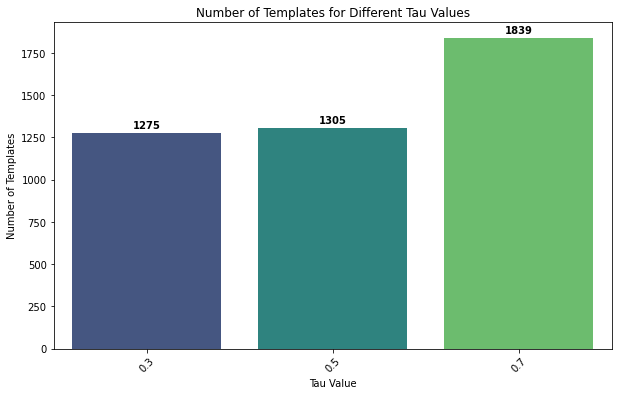

In [172]:
# plot bar chart to display the number of templates for each tau value 
import matplotlib.pyplot as plt
import seaborn as sns

tau_values = ['0.3', '0.5', '0.7']
template_counts = [t_03.shape[0], t_05.shape[0], t_07.shape[0]]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tau_values, y=template_counts, palette='viridis')

plt.title('Number of Templates for Different Tau Values')
plt.xlabel('Tau Value')
plt.ylabel('Number of Templates')
plt.xticks(rotation=45)

# Add exact numbers on top of each bar
for i, count in enumerate(template_counts):
    ax.text(i, count + max(template_counts)*0.01, str(count), ha='center', va='bottom', fontweight='bold')

## Vectors

## Loading data

In [55]:
df = pd.read_csv(LOG_MITRE)
df.shape

(121590, 7)

In [56]:
df.head()

,timestamp,log,technique,technique_id,tactic,label,log_cleaned
0,2023-12-26 17:47:11.857,type=SYSCALL msg=audit(1703612831.620:31532): ...,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.620:31532): ...
1,2023-12-26 17:47:15.803,type=SYSCALL msg=audit(1703612836.484:31534): ...,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.484:31534): ...
2,2023-12-26 17:47:15.810,type=SYSCALL msg=audit(1703612836.524:31536): ...,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.524:31536): ...
3,2023-12-26 17:47:15.815,type=SYSCALL msg=audit(1703612836.532:31537): ...,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.532:31537): ...
4,2023-12-26 17:47:21.832,type=SYSCALL msg=audit(1703612841.985:31541): ...,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.985:31541): ...


In [62]:
df['label'].value_counts()

label
0    96811
1    24779
Name: count, dtype: int64

In [64]:
df['label'].value_counts()[1]/df.shape[0] * 100

20.37914302163007

## Data Preparation

In [71]:
# save log_cleaned column from df to a .log file with a '- ' prefix for each line
log_file_path = os.path.join(LINUX_DIR, "LINUX24.log")
with open(log_file_path, 'w') as f:
    for line in df['log_cleaned']:
        f.write(f"- {line}\n")

print(f"Log file saved to: {log_file_path}")

Log file saved to: /home/ahmed.bargady/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/ahmed.bargady/data/github/my-logadempirical/dataset/preprocessed/LINUX24APT/LINUX24.log


In [68]:
s_03 = pd.read_csv(os.path.join(LINUX_DIR, "03.s.csv"))
t_03 = pd.read_csv(os.path.join(LINUX_DIR, "03.t.csv"))

In [69]:
s_03.shape, t_03.shape

((121590, 8), (1151, 3))

In [70]:
s_03.head()

,Timestamp,Technique,TechniqueId,Tactic,Label,Content,EventId,EventTemplate
0,2023-12-26 17:47:11.857,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.620:31532): ...,4efaf9a3,type SYSCALL msg audit <LONG NUM> <*> <*> <ME...
1,2023-12-26 17:47:15.803,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.484:31534): ...,77001f97,type SYSCALL msg audit <LONG NUM> <*> <*> <ME...
2,2023-12-26 17:47:15.810,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.524:31536): ...,3cdfd87d,type SYSCALL msg audit <LONG NUM> <*> <*> <ME...
3,2023-12-26 17:47:15.815,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.532:31537): ...,4efaf9a3,type SYSCALL msg audit <LONG NUM> <*> <*> <ME...
4,2023-12-26 17:47:21.832,NaN,NaN,NaN,0,type=SYSCALL msg=audit(<LONG_NUM>.985:31541): ...,77001f97,type SYSCALL msg audit <LONG NUM> <*> <*> <ME...


In [84]:
del df
gc.collect()

20

# Models Training
